In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns

# Import libraries for plotting functionalities
import matplotlib.pyplot as plt

# Set the default plotting style to 'ggplot' for a clean aesthetic
plt.style.use('ggplot')

In [2]:
# Reading the data
df = pd.read_csv(r"D:\Ronnie\Documents\Data Analytics\Internship Project\Portfolio Project\Python\movies.csv\movies.csv")

In [3]:
# Looking at the data
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [4]:
# Counting the null values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Checking datatypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Handle NaN values before converting to int64
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [7]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124


In [8]:
# year and released column is not consistent, hence Extracting year from 'released' column
df['released'] = df['released'].astype(str)
df['released'].head(3)

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
Name: released, dtype: object

In [9]:
# Extract the year using a regular expression
df['released-year'] = df['released'].str.extract(r'(\d{4})')
df['released-year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: released-year, Length: 7668, dtype: object

In [10]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released-year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980


In [11]:
# Deleting the old 'year' column
df = df.drop('year',axis=1)

In [12]:
#drop duplucates if any
df.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released-year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90,2020
7664,Dream Round,NaN,Comedy,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,NaN,Drama,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120,2020


In [13]:
# Sorting data by gross revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [14]:
df.head(3)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released-year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997


### My guesses for Co-relations.
1. As budget increases, gross earnings increases.
2. Big Companies makes high grossing films

#### 1. Budget vs Gross Earnings

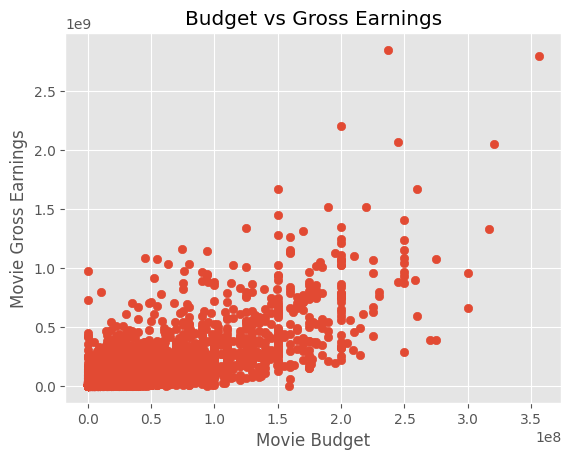

In [15]:
#Scatter plot with budget and gross
plt.scatter(x= df['budget'], y= df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Movie Budget')
plt.ylabel('Movie Gross Earnings')
plt.show()

In [16]:
df.head(3)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released-year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997


<Axes: xlabel='budget', ylabel='gross'>

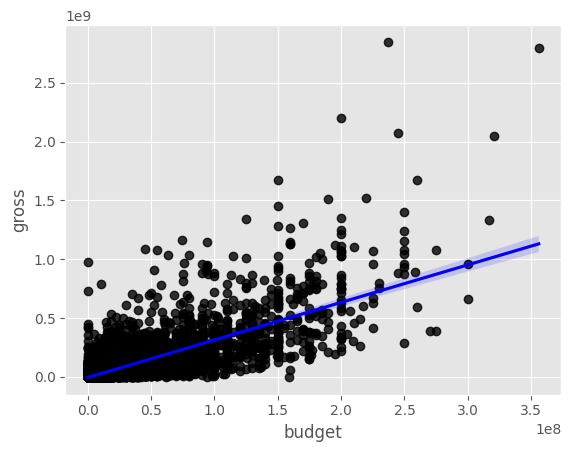

In [17]:
#Plot the budget vs gross using seaborn 
sns.regplot(x="budget", y="gross", data=df, scatter_kws = {'color':'black'}, line_kws = {'color':'blue'})

#### We can clearly see that Budget and Gross Earnings are positively corelated.

### Let's check Other corelations.

In [18]:
# defining correlations between variables(columns). Possible methods: pearson, kendall, spearman
df.corr(method = 'pearson', numeric_only=True) #df.corr() works only for numeric values

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.398387,0.306984,0.268372,0.244339,1.000000


In [19]:
df.corr(method = 'kendall', numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.300115,-0.005194,0.090626,0.283966
votes,0.300115,1.000000,0.439883,0.560449,0.197697
budget,-0.005194,0.439883,1.000000,0.541956,0.176184
gross,0.090626,0.560449,0.541956,1.000000,0.177429
runtime,0.283966,0.197697,0.176184,0.177429,1.000000


In [20]:
df.corr(method = 'spearman', numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.428138,-0.007500,0.132569,0.400394
votes,0.428138,1.000000,0.604693,0.752550,0.289359
budget,-0.007500,0.604693,1.000000,0.716816,0.246941
gross,0.132569,0.752550,0.716816,1.000000,0.257478
runtime,0.400394,0.289359,0.246941,0.257478,1.000000


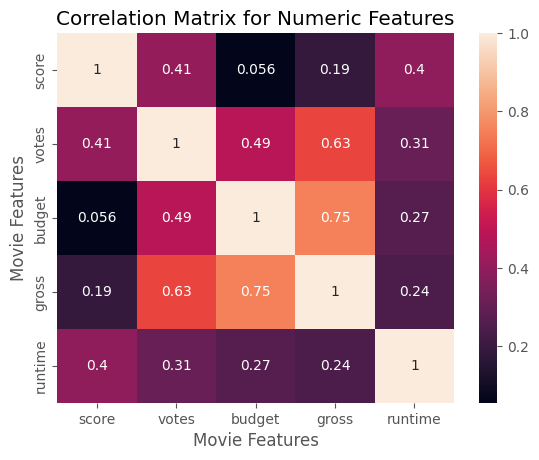

In [21]:
# Create the correlation matrix for numeric columns only
correlation_matrix = df.corr(numeric_only=True)

# Generate a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True)

# Set the title of the heatmap
plt.title("Correlation Matrix for Numeric Features")

# Set labels for the x-axis (columns) and y-axis (rows)
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

# Display the heatmap
plt.show()

The other co-relation i can see is High Grossing movies have good ratings.

### 2. Big Companies vs High Grossing Earnings

In [22]:
# Converting Company and other columns to numeric format in order to include columns in our matrix chart
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):  # Check if the column is of type 'object' (string)
        df_numerized[col_name] = df_numerized[col_name].astype('category')  # Convert the column to categorical format
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # Assign numerical codes to each category

# Print the first few rows of the modified dataframe to see the changes
df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released-year
5445,533,5,0,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29
7445,535,5,0,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,39
3045,6896,5,6,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17
6663,5144,5,0,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,35
7244,536,5,0,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,38


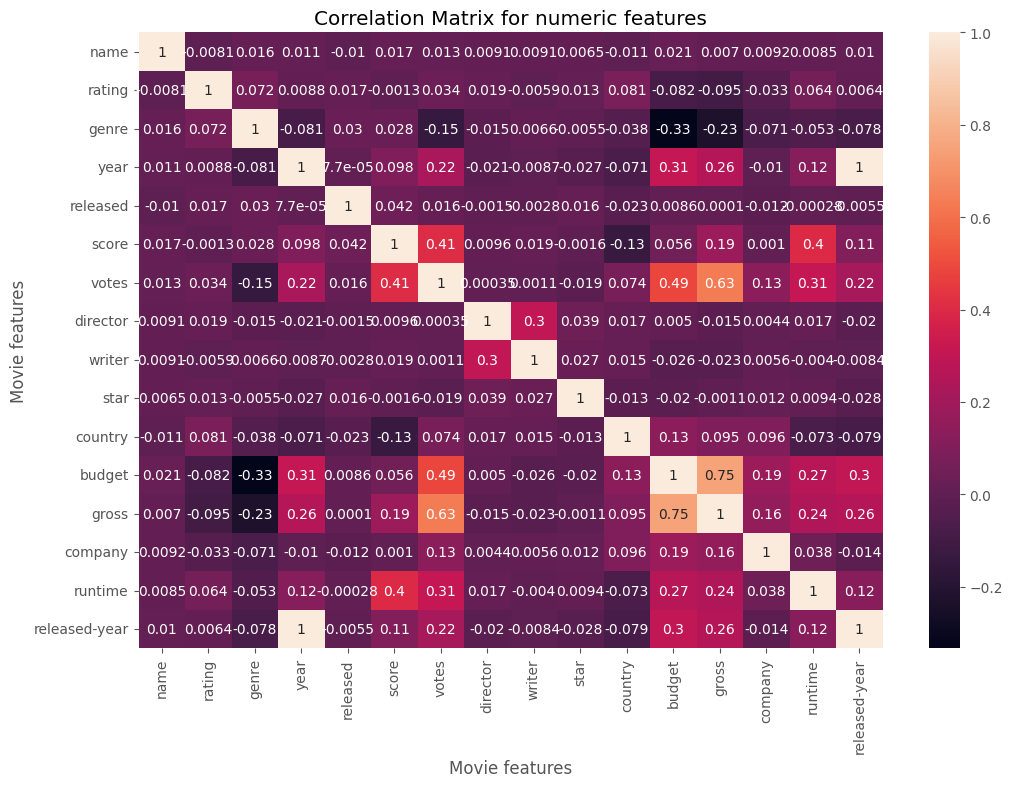

In [31]:
#Plotting correlations with all numeric values 
correlation_matrix = df.corr(method = 'pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [23]:
# Calculate the correlation matrix 
correlation_mat = df_numerized.corr()

# Get all pairs of correlation coefficients from the correlation matrix
corr_pairs = correlation_mat.unstack()

# Sort the correlation pairs by absolute value
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
votes   genre    -0.145296
dtype: float64

In [24]:
# identify high correlation
sorted_pairs[(sorted_pairs) > 0.5]

gross          votes            0.632870
votes          gross            0.632870
budget         gross            0.750157
gross          budget           0.750157
name           name             1.000000
writer         writer           1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released-year  released-year    1.000000
dtype: float64

#### Big Companies not necessarily always give High Grossing Earnings.

### So Finally, The 2 co-relations we can see are
1. Big Budgets produces high Grossing films.
2. High Grossing movies have good ratings.
   
3. Big Companies not necessarily always give High Grossing Profits.